In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline
sess = tf.Session()

In [4]:
#create data and variables
x_vals = np.random.normal(1,0.1,100)
y_vals = np.repeat(10.,100)
x_data = tf.placeholder(dtype=tf.float32,shape=[None,1])
y_target = tf.placeholder(dtype=tf.float32,shape=[None,1])
batch_size=25
train_indices = np.random.choice(len(x_vals),round(len(x_vals)*0.7),replace=False)
test_indices = np.array(list(set(range(len(x_vals)))-set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [5]:
#declare our model
my_ouput = tf.matmul(x_data,A)
loss = tf.reduce_mean(tf.square(my_ouput - y_target))
init = tf.initialize_all_variables()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [8]:
#train
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    if (i+1) % 20 == 0:
        print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))

Step # 20 A = [[7.8729315]]
Loss = 5.6892805
Step # 40 A = [[9.014812]]
Loss = 1.9217658
Step # 60 A = [[9.512959]]
Loss = 0.6217119
Step # 80 A = [[9.73642]]
Loss = 0.8126632
Step # 100 A = [[9.869774]]
Loss = 0.79501444


In [10]:
#evaluate the model
mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
print('MSE on test: ' + str(np.round(mse_test,2)))
print('MSE on train: ' + str(np.round(mse_train,2)))

MSE on test: 1.29
MSE on train: 0.83


In [12]:
#reload the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [18]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-1,1,50), np.random.normal(2,1,50)))
y_vals = np.concatenate((np.repeat(0.,50), np.repeat(1.,50)))
x_data = tf.placeholder(dtype=tf.float32,shape=[1,None])
y_target = tf.placeholder(dtype=tf.float32,shape=[1,None])
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.7),replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(mean=10,shape=[1]))

In [30]:
my_ouput = tf.multiply(x_data,A)
init = tf.initialize_all_variables()
sess.run(init)

In [31]:
#add the model and the loss function
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_ouput,labels=y_target))
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [36]:
#train
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train),size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    
    if(i+1)%200==0:
        print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy,feed_dict={x_data:rand_x,y_target:rand_y})))

Step # 200 A = [10.694206]
Loss = 0.25863823
Step # 400 A = [10.414406]
Loss = 0.46127698
Step # 600 A = [10.113912]
Loss = 0.14080876
Step # 800 A = [9.858592]
Loss = 0.17990726
Step # 1000 A = [9.552309]
Loss = 0.24354348
Step # 1200 A = [9.264722]
Loss = 0.4072985
Step # 1400 A = [8.986218]
Loss = 0.37623826
Step # 1600 A = [8.72691]
Loss = 0.3480879
Step # 1800 A = [8.460092]
Loss = 0.32610026


In [38]:
#evaluate the model
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.multiply(x_data,A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
acc_value_test = sess.run(accuracy,feed_dict={x_data:[x_vals_test],y_target:[y_vals_test]})
acc_value_train = sess.run(accuracy,feed_dict={x_data:[x_vals_train],y_target:[y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

Accuracy on train set: 0.9
Accuracy on test set: 0.8666667


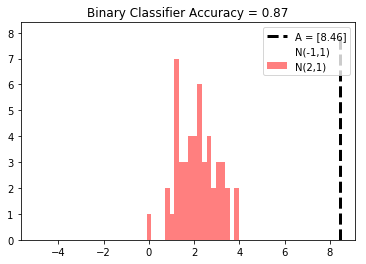

In [42]:
#plot
A_result = sess.run(A)
bins = np.linspace(-5,5,50)
plt.hist(x_vals[0:50],bins,alpha=0.5,label='N(-1,1)',color='white')
plt.hist(x_vals[50:100],bins[0:50],alpha=0.5,label='N(2,1)',color='red')
plt.plot((A_result,A_result), (0,8), 'k--', linewidth=3,label='A = '+str(np.round(A_result,2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier Accuracy = ' + str(np.round(acc_value_test, 2)))
plt.show()